In [2]:
import numpy as np
import pandas as pd
import math as math
import matplotlib.pyplot as plt 
import random as rnd

In [3]:
# Function performing elementwise 
def matrix_sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
# Function for elementwise standardization of the data
def sig_der(s):
    return s*(1-s)

In [5]:
# standardize the dataset
def standardize(data):
    X = data[:,0]
    Y = data[:,1]
    
    X = (X - np.mean(X))/np.std(X)
    Y = (Y - np.mean(Y))/np.std(Y)
    
    result = np.zeros(data.shape)
    result[:,0] = X
    result[:,1] = Y 
    return result

In [6]:
# With a single hiddent layer
def NN( epoc, rate, mmnt, hidden_no, data):
    
    # param
    data_length = data.shape[0]

    # h_param 
    inner_W = np.random.rand(hidden_no + 1,1)*2 - 1
    input_W = np.random.rand(2,hidden_no)*2 - 1
    
    
    # hidden layer 
    V = np.ones((data_length,hidden_no + 1))
    V_sig = np.ones((data_length,hidden_no + 1))
    
    # prepare data
    X = np.ones((data_length,2))
    X[:,0] = data[:,0]
    Y = data[:,1].reshape((data_length,1))
    
    # store error progression 
    error_array = np.zeros(epoc)
    
    # use moment 
    v_inner_bias = 0
    v_inn_neur_w = 0
    v_input_w = 0
    v_input_bias = 0
    
    for e in range(epoc):
        # calculate the forward pass prediction
        V[:,:hidden_no] = X.dot(input_W)
        V_sig[:,:hidden_no] = matrix_sigmoid( V[:,:hidden_no]) #pass through sigmoid
        Y_hat = V_sig.dot(inner_W)
            
        # calculate and record error 
        err = Y_hat - Y
        error_array[e] = (0.5/data_length)*np.sum(np.square(err))
            
        # calculate inner bias weight gradient
        d_inner_bias = np.sum(err)/data_length # inner layer bias gradien  
            
        # calculate inner neuron weight gradients 
        d_inn_neur_w = (( 1/data_length)* err.transpose() \
                            .dot(V_sig[:,:hidden_no])).transpose()
            
        # calculate input bias weighth gradient
        d_input_bias = (1/data_length)* np.multiply( inner_W[:hidden_no,:].transpose() , \
                            err.transpose().dot(np.multiply(V_sig[:,:hidden_no], \
                                                         1 - V_sig[:,:hidden_no])))

        # calculate input weight gradients 
        d_input_w = (1/data_length)* np.multiply( inner_W[:hidden_no,:].transpose(), \
                           np.multiply( X[:,0].reshape(data_length,1), err)\
                          .transpose().dot(np.multiply(V_sig[:,:hidden_no], \
                                                        1 - V_sig[:,:hidden_no])))

        # compute moments
        v_inner_bias = mmnt*v_inner_bias + (1-mmnt)*d_inner_bias
        v_inn_neur_w = mmnt*v_inn_neur_w + (1-mmnt)*d_inn_neur_w
        v_input_w = mmnt*v_input_w + (1-mmnt)*d_input_w
        v_input_bias = mmnt*v_input_bias + (1-mmnt)*d_input_bias

        # update inner weights 
        inner_W[hidden_no] = inner_W[hidden_no] - rate*v_inner_bias
        inner_W[:hidden_no] = inner_W[:hidden_no] - rate*v_inn_neur_w

        # update input weights
        input_W[0,:] = input_W[0,:] - rate*v_input_w
        input_W[1,:] = input_W[1,:] - rate*v_input_bias  
        
    # plot Loss
    plt.plot(error_array)
    plt.title('Loss')
    print('Final Loss: ', error_array[epoc-1]) #,'Final: ',error_array[epoc-1] )
    
    return input_W, inner_W

In [9]:
def plot_NN_result( input_W_predicted, inner_W_predicted, data, title):
    
    # extract parameters 
    hidden_no = inner_W_predicted.shape[0] - 1
    
    # plot the data
    sort_ind_data = np.argsort( data[:,0] )
    plt.figure()
    plt.plot(data[:,0][sort_ind_data], data[:,1][sort_ind_data])
    
    # take an x in corresponding range
    x_approx = np.arange(np.amin(data[:,0]), np.amax(data[:,0]), 0.01)
    
    # prepare input for forward pass
    data_length = x_approx.shape[0]
    X = np.ones((data_length,2))
    X[:,0] = x_approx
    
    # prepare hidden layer
    V = np.ones((data_length,hidden_no + 1))
    V_sig = np.ones((data_length,hidden_no + 1))
    
    # Propogate forward    
    V[:,:hidden_no] = X.dot(input_W_predicted)
    V_sig[:,:hidden_no] = matrix_sigmoid( V[:,:hidden_no]) #pass through sigmoid
    Y_hat = V_sig.dot(inner_W_predicted)
    
    # plot the result
    plt.plot(x_approx,Y_hat)
    plt.title(title)    

In [17]:
## Test Your Results

In [10]:
#Read data 
train = np.array( pd.read_csv("train.txt", header = None, delim_whitespace=True, skipinitialspace=True),dtype=np.double)
test = np.array( pd.read_csv("test.txt", header = None, delim_whitespace=True, skipinitialspace=True),dtype=np.double)

# Standardization your data 
train = standardize(train)
test = standardize(test)

Final Loss:  0.04691794506494733


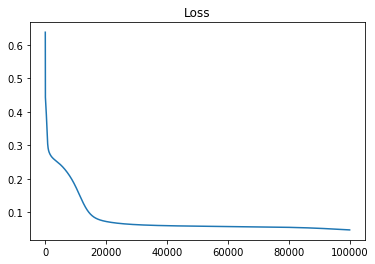

In [11]:
# Train the model
W1, W2 = NN( 100000, 0.1, 0, 32, train)

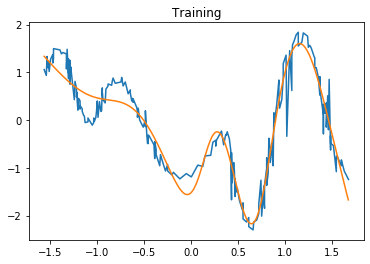

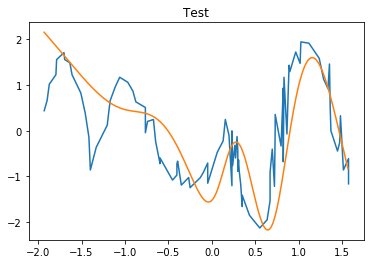

In [12]:
#plot results
plot_NN_result(input_W_predicted = W1, inner_W_predicted= W2,  data=train, title='Training')
plot_NN_result(input_W_predicted = W1, inner_W_predicted= W2,  data=test, title='Test')